In [20]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [21]:
df=pd.read_csv('C:/Users/hp/Desktop/small projects/stock market using Linear/data/sp500.csv')

In [22]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [23]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_1528\3023999556.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date']=pd.to_datetime(df['Date'])


In [24]:
df.isnull().sum()


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [25]:
df['Target'] = df['Close'].shift(-1)


In [26]:
df.info()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24594 entries, 0 to 24593
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          24594 non-null  object 
 1   Open          24594 non-null  float64
 2   High          24594 non-null  float64
 3   Low           24594 non-null  float64
 4   Close         24594 non-null  float64
 5   Volume        24594 non-null  int64  
 6   Dividends     24594 non-null  float64
 7   Stock Splits  24594 non-null  float64
 8   Target        24593 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.7+ MB


In [27]:
X=df[['Open', 'High', 'Low', 'Close', 'Volume']]
y=df['Target']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
sc=StandardScaler()
y.dropna(inplace=True)

In [30]:
X_test_sc=sc.fit_transform(X_test)
X_train_sc=sc.fit_transform(X_train)

In [31]:
model_LR=LinearRegression()

In [32]:
y_train.isna().sum()

np.int64(0)

In [33]:
X_train_sc.shape

(19674, 5)

In [34]:
model_LR.fit(X_train_sc, y_train)

LinearRegression()

In [35]:
y_pred=model_LR.predict(X_test_sc)

In [36]:
mean_squared_error(y_test, y_pred)

326.92291832712203

In [37]:
r2_score(y_test, y_pred)

0.9997718117010574

In [38]:
model_LR.score(X_test_sc, y_test)

0.9997718117010574

Text(0, 0.5, 'Predicted Prices')

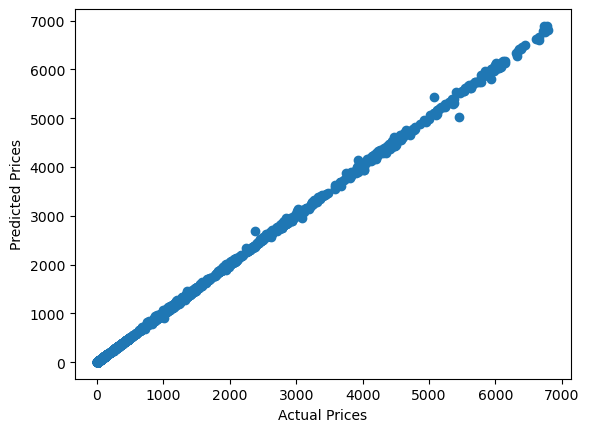

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")